In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
#data collection
#loading dataset into pandas dataframe
train_df = pd.read_csv('WELFake_Dataset.csv')

In [3]:
train_df.head(15)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [4]:
train_df = train_df.drop("Unnamed: 0", axis = 1)
train_df = train_df.drop("title", axis = 1)

In [5]:
train_df.shape

(72134, 2)

In [6]:
train_df.head(15)

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,All we can say on this one is it s about time ...,1
6,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,,1
8,"The owner of the Ringling Bar, located south o...",1
9,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [7]:
train_df.isna().sum()

text     39
label     0
dtype: int64

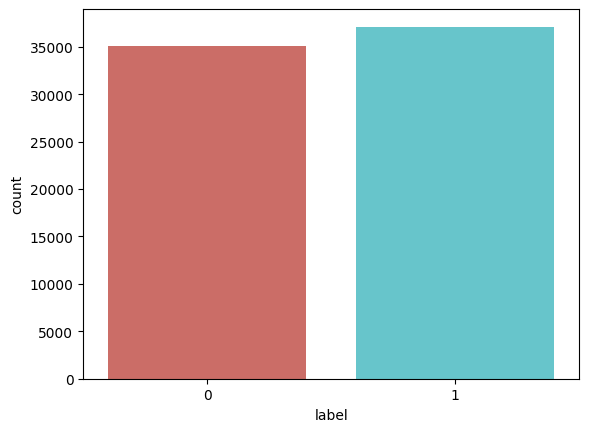

<Axes: xlabel='label', ylabel='count'>

In [8]:
import seaborn as sb
import matplotlib.pyplot as plt

def create_distribution(dataFile):
    plot = sb.countplot(x='label', hue='label', data=dataFile, palette='hls', legend=False)
    plt.show()
    return plot

# Call the function to create the distribution plot
create_distribution(train_df)


In [9]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    72095 non-null  object
 1   label   72134 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
check finished.


In [10]:
train_df = train_df.dropna()

In [11]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Index: 72095 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    72095 non-null  object
 1   label   72095 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB
check finished.


In [12]:
train_df.shape

(72095, 2)

In [13]:
train_df.head(10)

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,All we can say on this one is it s about time ...,1
6,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,,1
8,"The owner of the Ringling Bar, located south o...",1
9,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [14]:
train_df.reset_index(drop= True,inplace=True)

In [15]:
train_df.head(10)

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,All we can say on this one is it s about time ...,1
6,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,,1
8,"The owner of the Ringling Bar, located south o...",1
9,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [16]:
train_df.isnull().sum()

text     0
label    0
dtype: int64

**Randomly shuffling the dataframe**

In [17]:
train_df=train_df.sample(frac=1)

In [18]:
train_df.head()

,text,label
54428,"In Texas, Alabama and elsewhere a number of cl...",0
38434,source Add To The Conversation Using Facebook ...,1
28229,WASHINGTON (Reuters) - Senate Democratic Leade...,0
17099,"Demonizing Russian Media November 23, 2016 \nT...",1
21235,Some people believe that Trump is journaling ...,1


In [19]:
train_df.reset_index(inplace=True)
train_df.drop(['index'],axis=1,inplace=True)

In [20]:
train_df.columns

Index(['text', 'label'], dtype='object')

In [21]:
train_df.head()

,text,label
0,"In Texas, Alabama and elsewhere a number of cl...",0
1,source Add To The Conversation Using Facebook ...,1
2,WASHINGTON (Reuters) - Senate Democratic Leade...,0
3,"Demonizing Russian Media November 23, 2016 \nT...",1
4,Some people believe that Trump is journaling ...,1


**Preprocessing Text**

**Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.**

In [22]:
import re
import string

def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r"\W", " ", text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


In [24]:
train_df['text'] = train_df['text'].apply(wordopt)

**Defining dependent and independent variable as x and y**



In [25]:
x = train_df['text']
y = train_df['label']

Training the model

**Splitting the dataset into training set and testing set.**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

Extracting Features from the Text

**Convert text to vectors**

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

**Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [30]:
pred_lr = LR.predict(xv_test)

In [31]:
LR.score(xv_test, y_test)

0.9439081225033289

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8716
           1       0.94      0.96      0.95      9308

    accuracy                           0.94     18024
   macro avg       0.94      0.94      0.94     18024
weighted avg       0.94      0.94      0.94     18024



**Confusion Matrix**

Text(70.72222222222221, 0.5, 'Real Labels')

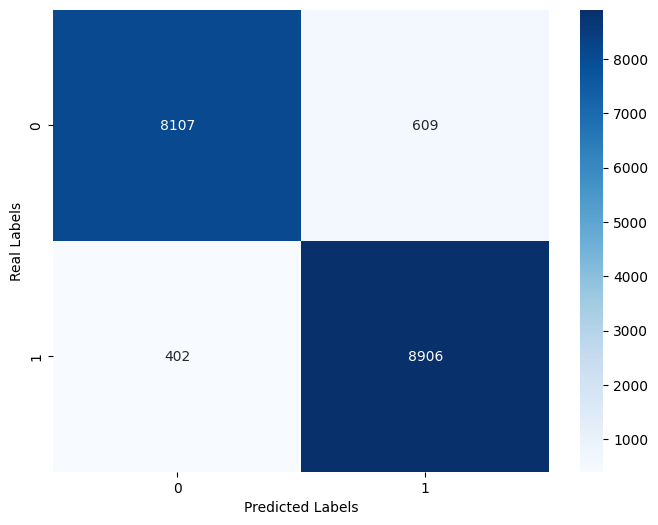

In [33]:
plt.figure(figsize = (8,6))

sb.heatmap(confusion_matrix(y_test,pred_lr), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

**Decision Tree Classifier**

In [34]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [35]:
pred_dt = DT.predict(xv_test)


In [36]:
DT.score(xv_test, y_test)

0.9190523746116289

In [37]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8716
           1       0.94      0.96      0.95      9308

    accuracy                           0.94     18024
   macro avg       0.94      0.94      0.94     18024
weighted avg       0.94      0.94      0.94     18024



**Confusion Matrix**

Text(70.72222222222221, 0.5, 'Real Labels')

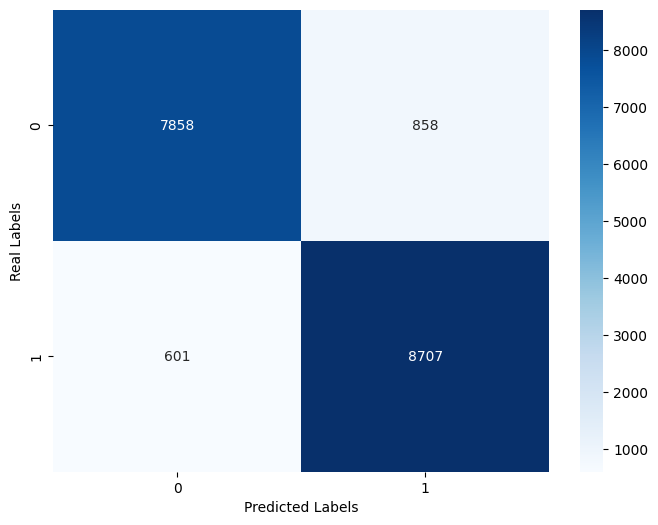

In [38]:
plt.figure(figsize = (8,6))

sb.heatmap(confusion_matrix(y_test,pred_dt), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

**Random Forest Classifier**

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)


RandomForestClassifier(random_state=0)

In [41]:
pred_rf = RF.predict(xv_test)


In [42]:

RF.score(xv_test, y_test)

0.926930758988016

In [43]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      8716
           1       0.92      0.94      0.93      9308

    accuracy                           0.93     18024
   macro avg       0.93      0.93      0.93     18024
weighted avg       0.93      0.93      0.93     18024



**Confusion Matrix**

Text(70.72222222222221, 0.5, 'Real Labels')

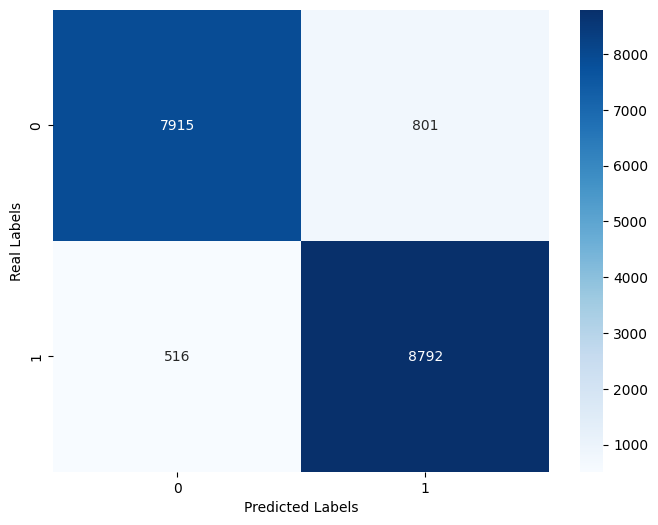

In [44]:
plt.figure(figsize = (8,6))

sb.heatmap(confusion_matrix(y_test,pred_rf), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

**Testing the Model**


In [45]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {}  \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_RF[0])))

**Model Testing With Manual Entry**

In [47]:
news = str(input()) 
manual_testing(news)


 BRUSSELS (Reuters) - British Prime Minister Theresa May s offer of  settled status  for EU residents is flawed and will leave them with fewer rights after Brexit, the European Parliament s Brexit coordinator said on Tuesday. A family of five could face a bill of 360 pounds to acquire the new status, Guy Verhofstadt told May s Brexit Secretary David Davis in a letter seen by Reuters    a very significant amount for a family on low income . Listing three other concerns for the EU legislature, which must approve any treaty on the March 2019 exit, Verhofstadt told Davis:  Under your proposals, EU citizens will definitely notice a deterioration of their status as a result of Brexit. And the Parliament s aim all along has been that EU citizens, and UK citizens in the EU-27, should notice no difference.  Verhofstadt, a former Belgian prime minister, wrote in response to Davis, who had written to him after Parliament complained last week that there remained  major issues  to be settled on the



LR Predicition: Fake News 
DT Prediction: Fake News  
RFC Prediction:Fake News


In [48]:
news = str(input()) 
manual_testing(news)

 "The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons â€“ 2,000 times as powerful as the atom bombs dropped on Hiroshima and Nagasaki in 1945 By LIBBY PLUMMER and GARETH DAVIE S Russia has unveiled chilling pictures of its largest ever nuclear missile, capable of destroying an area the size of France. The RS-28 Sarmat missile, dubbed Satan 2 by Nato, has a top speed of 4.3 miles (7km) per second and has been designed to outfox anti-missile shield systems. The new Sarmat missile could deliver warheads of 40 megatons â€“ 2,000 times as powerful as the atom bombs dropped on Hiroshima and Nagasaki in 1945. Scroll down for video Russian President Vladimir Putin is reportedly planning to replace the countryâ€™s older SS-18 Satan weapons with the new missiles amid a string of recent disagreemen



LR Predicition: Not A Fake News 
DT Prediction: Not A Fake News  
RFC Prediction:Not A Fake News


In [46]:
import pickle

In [47]:
# Import required library
import pickle

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorization, f)
    print("Vectorizer saved as 'vectorizer.pkl'")

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(LR, f)
    print("Model saved as 'model.pkl'")

Vectorizer saved as 'vectorizer.pkl'
Model saved as 'model.pkl'
